In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:-1].values

In [4]:
print(X)

[[44.]
 [27.]
 [30.]
 [38.]
 [40.]
 [35.]
 [nan]
 [48.]
 [50.]
 [37.]]


In [5]:
print(y)

[[72000.]
 [48000.]
 [54000.]
 [61000.]
 [   nan]
 [58000.]
 [52000.]
 [79000.]
 [83000.]
 [67000.]]


In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
imputer.fit(y)
y = imputer.transform(y)

In [11]:
print(y)

[[72000.        ]
 [48000.        ]
 [54000.        ]
 [61000.        ]
 [63777.77777778]
 [58000.        ]
 [52000.        ]
 [79000.        ]
 [83000.        ]
 [67000.        ]]


In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [13]:
print(X)

[[ 0.75887436]
 [-1.71150388]
 [-1.27555478]
 [-0.11302384]
 [ 0.17760889]
 [-0.54897294]
 [ 0.        ]
 [ 1.34013983]
 [ 1.63077256]
 [-0.25834021]]


In [14]:
print(y)

[[ 7.49473254e-01]
 [-1.43817841e+00]
 [-8.91265492e-01]
 [-2.53200424e-01]
 [ 6.63219199e-16]
 [-5.26656882e-01]
 [-1.07356980e+00]
 [ 1.38753832e+00]
 [ 1.75214693e+00]
 [ 2.93712492e-01]]


In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[45]])))

array([73058.0169941])

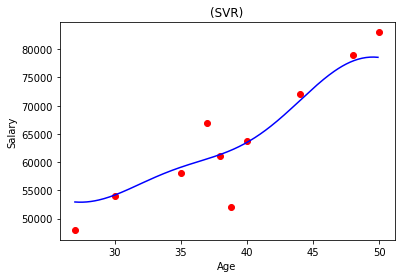

In [19]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('(SVR)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()